This is Haberman's data set to calculate a person will survive after
surgery of breast cancer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

In [2]:
cancer = pd.read_csv("haberman_csv.csv")
cancer.head()

,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
cancer.shape

(306, 4)

It has 4 columns and 306 rows.

In [4]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age_of_patient_at_time_of_operation           306 non-null int64
Patients_year_of_operation                    306 non-null int64
Number_of_positive_axillary_nodes_detected    306 non-null int64
Survival_status                               306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


 It has 4 columns, 306 entries in each column.
 All values are in int64, so need to change it.
 
 
 


In [5]:
#let's see how many patient will survive more than 5  years or die
cancer['Survival_status'].value_counts()


1    225
2     81
Name: Survival_status, dtype: int64

1: patient will survive more than 5 years,          
2: pateint will die before 5 years

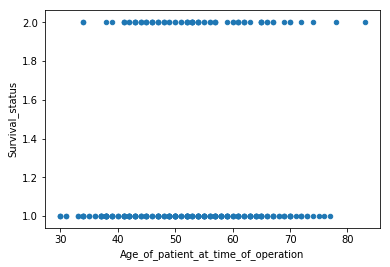

In [6]:
cancer.plot(kind = "scatter", x ="Age_of_patient_at_time_of_operation", y = "Survival_status" )

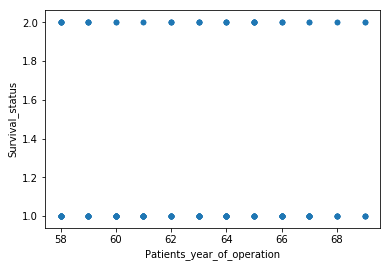

In [7]:
cancer.plot(kind = "scatter", x ="Patients_year_of_operation", y = "Survival_status" )

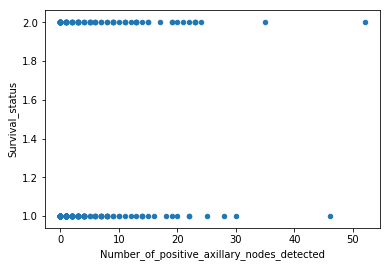

In [8]:
cancer.plot(kind = "scatter", x ="Number_of_positive_axillary_nodes_detected", y = "Survival_status" )

by plotting scatter plot we are not able to differniate what features are important to us

C:\Users\Namratesh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


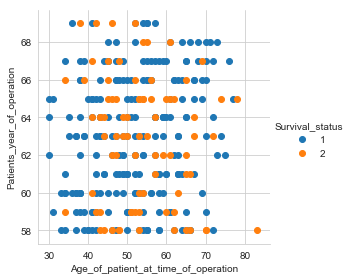

In [9]:
sns.set_style("whitegrid")
sns.FacetGrid(cancer, hue = "Survival_status", size =4).map(plt.scatter,"Age_of_patient_at_time_of_operation","Patients_year_of_operation").add_legend()


C:\Users\Namratesh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Namratesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Namratesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Namratesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\User

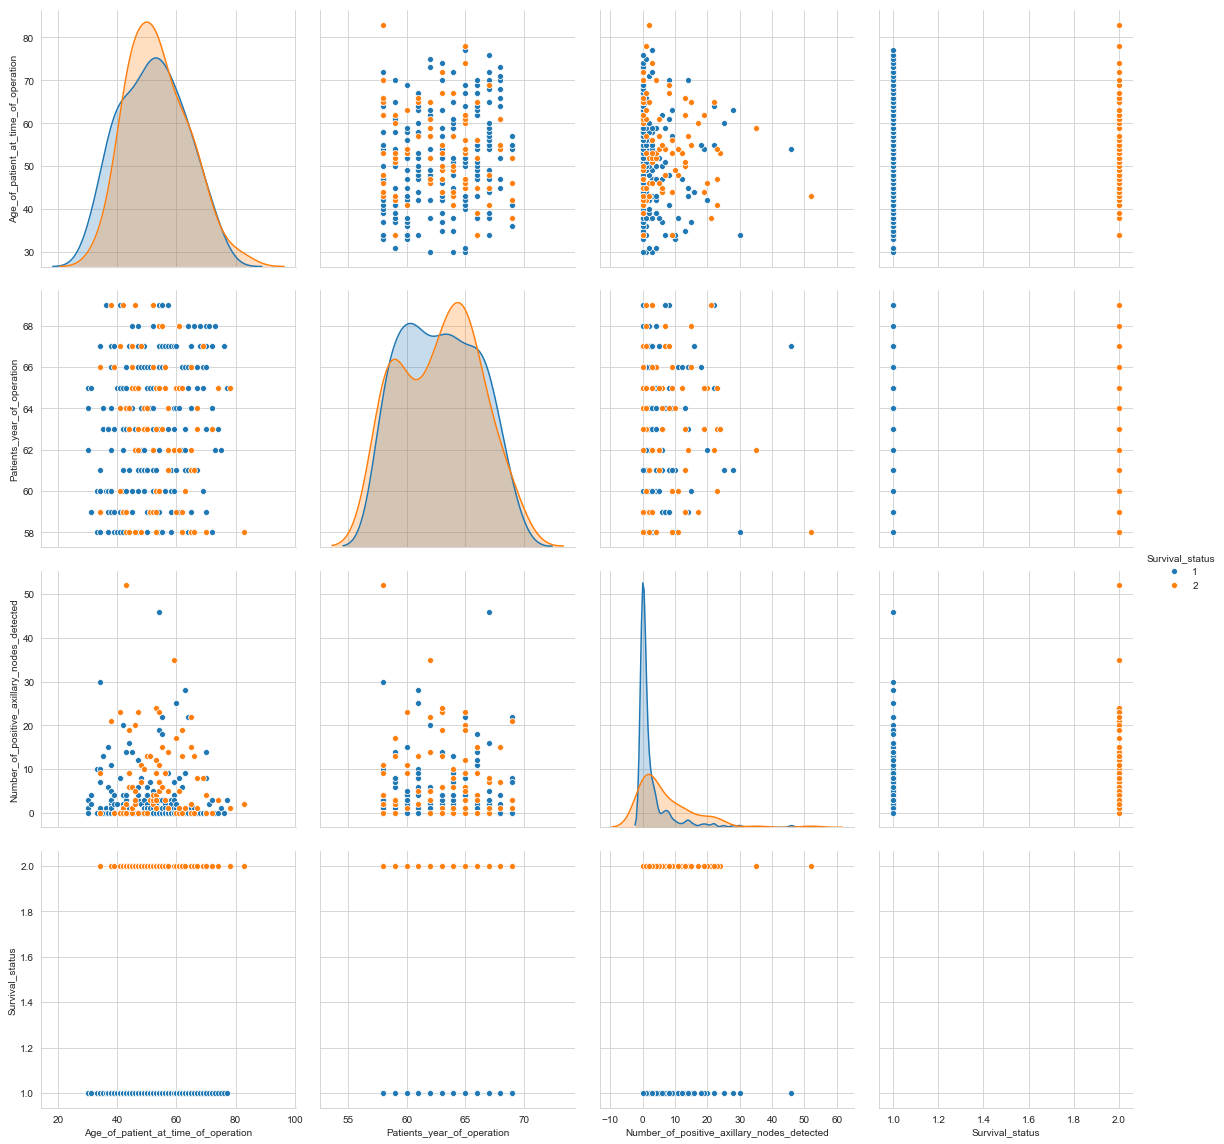

In [10]:
sns.set_style("whitegrid")
sns.pairplot(cancer, hue = "Survival_status", size = 4)

plotting all plots  don't give much senese of data

C:\Users\Namratesh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


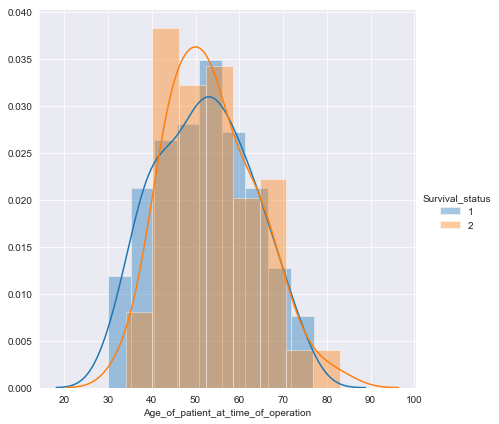

In [11]:
sns.set_style("darkgrid")
sns.FacetGrid(cancer, hue = 'Survival_status', size = 6).map(sns.distplot,"Age_of_patient_at_time_of_operation").add_legend()

C:\Users\Namratesh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


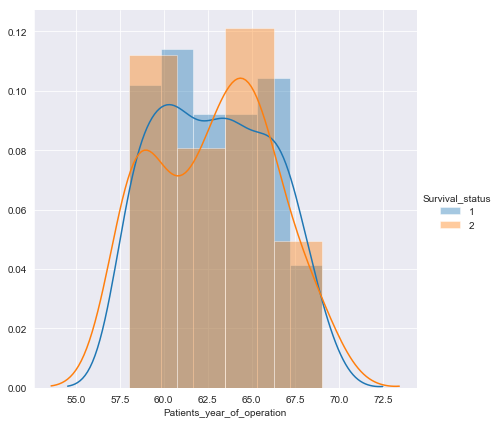

In [12]:
sns.set_style("darkgrid")
sns.FacetGrid(cancer, hue = 'Survival_status', size = 6).map(sns.distplot,"Patients_year_of_operation").add_legend()

C:\Users\Namratesh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


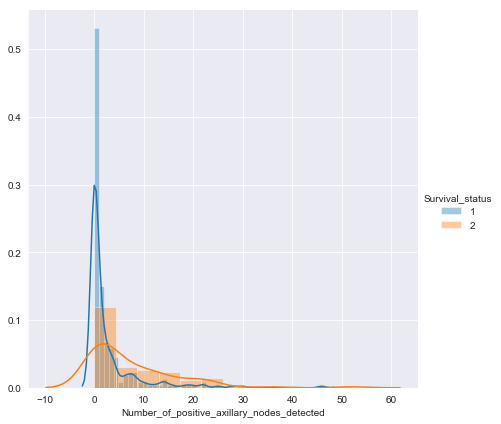

In [13]:
sns.set_style("darkgrid")
sns.FacetGrid(cancer, hue = 'Survival_status', size = 6).map(sns.distplot,"Number_of_positive_axillary_nodes_detected").add_legend()

Potting this types plot also didn't give any relation about survival status, data are overlapping

[0.73529412 0.         0.         0.         0.         0.
 0.         0.         0.         0.26470588]
[0.73529412 0.73529412 0.73529412 0.73529412 0.73529412 0.73529412
 0.73529412 0.73529412 0.73529412 1.        ]


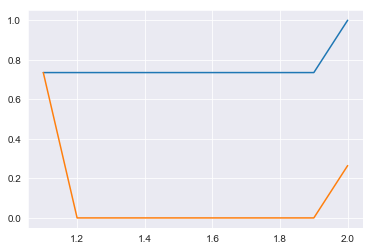

In [15]:
#plotting pdf and cdf
counts, bin_edges = np.histogram(cancer['Survival_status'], bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],cdf)
plt.plot(bin_edges[1:],pdf)

Even we are not getting anything from this plot

In [16]:
cancer_survive = cancer.loc[cancer['Survival_status'] == 1]
cancer_not_survive = cancer.loc[cancer['Survival_status'] == 2]

[0.41358025 0.04938272 0.0308642  0.         0.02469136 0.07407407
 0.11728395 0.22839506 0.05555556 0.00617284]
[0.73529412 0.73529412 0.73529412 0.73529412 0.73529412 0.73529412
 0.73529412 0.73529412 0.73529412 1.        ]


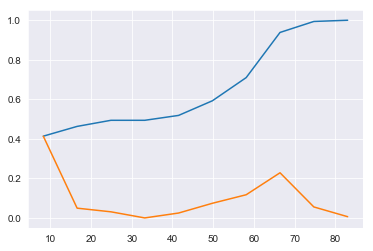

In [17]:
counts, bin_edges = np.histogram(cancer_not_survive, bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(cdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.plot(bin_edges[1:],pdf)

[0.41358025 0.04938272 0.0308642  0.         0.02469136 0.07407407
 0.11728395 0.22839506 0.05555556 0.00617284]
[0.41358025 0.46296296 0.49382716 0.49382716 0.51851852 0.59259259
 0.70987654 0.9382716  0.99382716 1.        ]
[0.48888889 0.01333333 0.07888889 0.21333333 0.20555556]
[0.41358025 0.46296296 0.49382716 0.49382716 0.51851852 0.59259259
 0.70987654 0.9382716  0.99382716 1.        ]


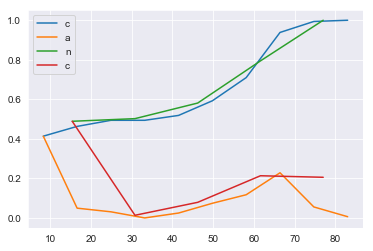

In [18]:
counts, bin_edges = np.histogram(cancer_not_survive, bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(cdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.plot(bin_edges[1:],pdf)

counts, bin_edges = np.histogram(cancer_survive, bins = 5, density = True)
pdf = counts/sum(counts)
print(pdf)
print(cdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.plot(bin_edges[1:],pdf)
plt.legend('cancer_survive')


here, also didn't get anything about it

C:\Users\Namratesh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Namratesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


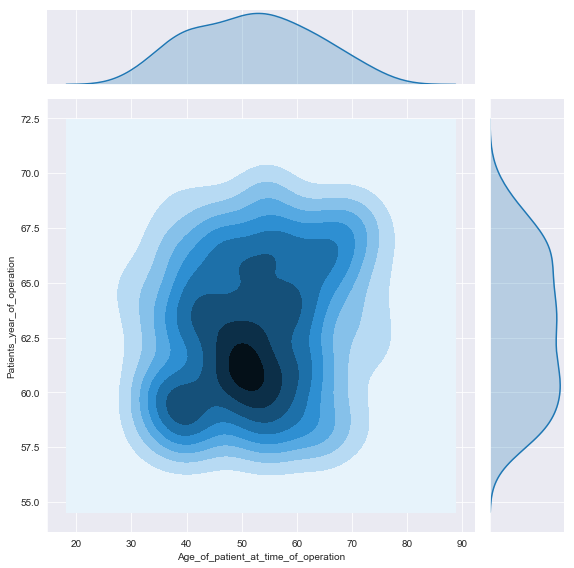

In [19]:
sns.jointplot(x ="Age_of_patient_at_time_of_operation", y = "Patients_year_of_operation", data = cancer_survive, kind = "kde", size = 8 )

dark area shows the relation between age of patient at time of operation vs patient year of opertation.
Even it is not giving any detail.

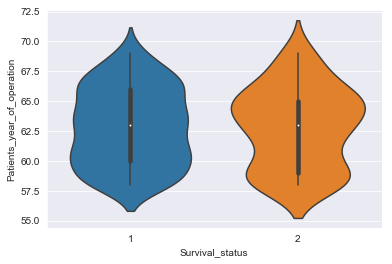

In [20]:
sns.violinplot(x = "Survival_status", y = "Patients_year_of_operation", data = cancer, size =10)

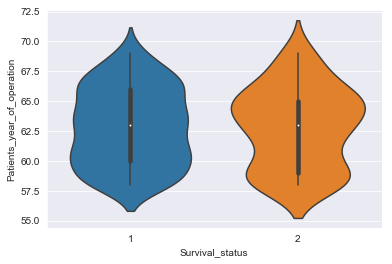

In [21]:
sns.violinplot(x = "Survival_status", y = "Patients_year_of_operation", data = cancer, size =10)